In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
from common.utils import*
from common.experiments import*
from common.networks import*

In [2]:
# Create a DataLoader
train_dataset,test_dataset = load_mnist(None) # first we load 2000 random digits for the training
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True,num_workers=8,pin_memory=True,collate_fn=one_hot_collate)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False,num_workers=8,pin_memory=True,collate_fn=one_hot_collate)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



/srv/conda/envs/notebook/lib/python3.9/site-packages/torch/utils/data/dataloader.py:563: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [3]:
pretrain_set = [i[0] for i in train_dataset]
digits_test = torch.stack(pretrain_set).float()

In [4]:
device =  torch.device('cuda')
pretraining_args = Args(
     n_steps = 100,
     gibbs = 1,
     alpha = 1e-1,
     data = digits_test,
     batch_size = 128,
)
training_args = Args(
     lr = 1e-4,
     n_epochs = 30,
     train_loader = train_loader,
     test_loader = test_loader,
     device = device
    )
num_classes = 10
input_size = 784
history = {"accuracy":[], "pretrained_accuracy":[]}

In [5]:
for i,n_neurons in enumerate(range(100,2000,200)):
    hidden_sizes =[n_neurons, n_neurons]
    print("\nConfig {}".format(i+1))
    model,pretrain_model = get_config(input_size=input_size,
                                        num_classes=num_classes,
                                        layer_config=hidden_sizes,
                                     device=device)
    accuracy,pretrain_accuracy = run_experiment(model=model,
                                            pretrain_model=pretrain_model,
                                            training=training_args,
                                            pretraining=pretraining_args)
    history['accuracy'].append(accuracy)
    history['pretrained_accuracy'].append(pretrain_accuracy)


Config 1
[INFO] training model 1 from scratch


100%|██████████| 30/30 [01:05<00:00,  2.19s/it]


[INFO] Pretraining  model 2 


100%|██████████| 2/2 [01:23<00:00, 41.80s/it]


[INFO] training model 2


100%|██████████| 30/30 [01:05<00:00,  2.17s/it]

[INFO] Evaluating models 



Config 2
[INFO] training model 1 from scratch


100%|██████████| 30/30 [01:04<00:00,  2.17s/it]


[INFO] Pretraining  model 2 


100%|██████████| 2/2 [01:24<00:00, 42.21s/it]


[INFO] training model 2


100%|██████████| 30/30 [01:05<00:00,  2.18s/it]

[INFO] Evaluating models 



Config 3
[INFO] training model 1 from scratch


100%|██████████| 30/30 [01:05<00:00,  2.18s/it]


[INFO] Pretraining  model 2 


100%|██████████| 2/2 [01:26<00:00, 43.47s/it]


[INFO] training model 2


100%|██████████| 30/30 [01:05<00:00,  2.17s/it]

[INFO] Evaluating models 



Config 4
[INFO] training model 1 from scratch


100%|██████████| 30/30 [01:05<00:00,  2.20s/it]


[INFO] Pretraining  model 2 


100%|██████████| 2/2 [01:26<00:00, 43.35s/it]


[INFO] training model 2


100%|██████████| 30/30 [01:05<00:00,  2.19s/it]

[INFO] Evaluating models 



Config 5
[INFO] training model 1 from scratch


100%|██████████| 30/30 [01:06<00:00,  2.23s/it]


[INFO] Pretraining  model 2 


100%|██████████| 2/2 [01:26<00:00, 43.30s/it]


[INFO] training model 2


100%|██████████| 30/30 [01:06<00:00,  2.21s/it]

[INFO] Evaluating models 



Config 6
[INFO] training model 1 from scratch


100%|██████████| 30/30 [01:07<00:00,  2.24s/it]


[INFO] Pretraining  model 2 


100%|██████████| 2/2 [01:28<00:00, 44.07s/it]


[INFO] training model 2


100%|██████████| 30/30 [01:07<00:00,  2.25s/it]

[INFO] Evaluating models 



Config 7
[INFO] training model 1 from scratch


100%|██████████| 30/30 [01:07<00:00,  2.26s/it]


[INFO] Pretraining  model 2 


100%|██████████| 2/2 [01:38<00:00, 49.06s/it]


[INFO] training model 2


100%|██████████| 30/30 [01:07<00:00,  2.25s/it]

[INFO] Evaluating models 



Config 8
[INFO] training model 1 from scratch


100%|██████████| 30/30 [01:08<00:00,  2.30s/it]


[INFO] Pretraining  model 2 


100%|██████████| 2/2 [01:52<00:00, 56.41s/it]


[INFO] training model 2


100%|██████████| 30/30 [01:08<00:00,  2.30s/it]

[INFO] Evaluating models 



Config 9
[INFO] training model 1 from scratch


100%|██████████| 30/30 [01:10<00:00,  2.34s/it]


[INFO] Pretraining  model 2 


100%|██████████| 2/2 [02:12<00:00, 66.27s/it]


[INFO] training model 2


100%|██████████| 30/30 [01:10<00:00,  2.34s/it]

[INFO] Evaluating models 



Config 10
[INFO] training model 1 from scratch


100%|██████████| 30/30 [01:11<00:00,  2.40s/it]


[INFO] Pretraining  model 2 


100%|██████████| 2/2 [02:31<00:00, 75.51s/it]


[INFO] training model 2


100%|██████████| 30/30 [01:11<00:00,  2.39s/it]

[INFO] Evaluating models 


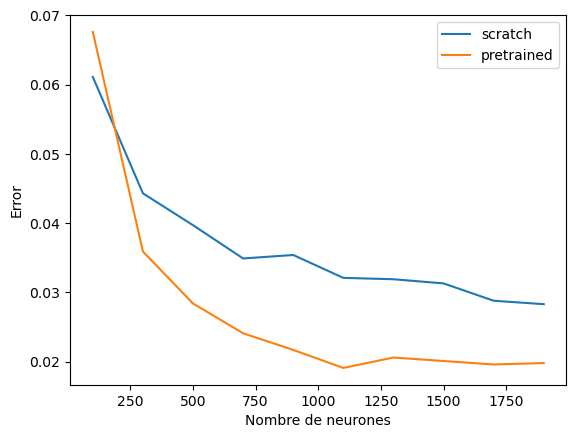

In [7]:
plt.plot(range(100,2000,200),1-np.array(history['accuracy']),label="scratch")
plt.plot(range(100,2000,200),1-np.array(history['pretrained_accuracy']),label="pretrained")
plt.xlabel('Nombre de neurones')
plt.ylabel('Error')
plt.legend()